> **University of Pisa** \
> **M.Sc. Computer Science, Artificial Intelligence** \
> **Continual learning 2022/23** \
> **Authors**
* Andrea Iommi - a.iommi2@studenti.unipi.it

# Memory Replay GANs
# Learning to generate images from new categories without forgetting
#### [(original paper)](https://proceedings.neurips.cc/paper/2018/hash/a57e8915461b83adefb011530b711704-Abstract.html)
### Notebooks
*   Classical acGAN in offline settings
*   Classical acGAN in online settings
*   acGAN with join retrain
*   **acGAN with replay alignment**


In [13]:
import torch
from Trainer import Trainer
from Utils import custom_mnist
from Plot_functions import generate_classes, plot_history

In [9]:
device = "cuda" if torch.cuda.is_available() else "cpu"
config = dict(
    device=device,
    num_classes=10,
    img_size=32,
    embedding=100,
    channels=1,
    n_epochs=30,
    batch_size=64,
    lr_g=0.0002,
    lr_d=0.0002
)

## acGAN with replay alignment (training)
We create the acGAN with the replay alignment, the architecture is very similar to the classical acGAN, in fact, the model learns only with the current experience. However, in this implementation, we added new loss added, the **replay alignment**.

The behavior is the following: in the first experience, the model learns as a classical acGAN. Starting from the second experience, the generator wants to optimize not only the adversarial and auxiliary loss, but **also minimize the L2 of difference between the current generator and the previous one** (experience) in the past classes.

In [10]:
experiences = [[0,1,2],[3,4,5],[6,7,8,9]]
trainer = Trainer(config=config)
history = trainer.fit_replay_alignment(experiences=custom_mnist(experiences = experiences),
                                       create_gif=False)

Dataset found...
Experience --  1 numbers [0, 1, 2]


100%|██████████| 291/291 [00:10<00:00, 28.09it/s]


[1/30] Loss_D: 1.0936 Loss_G: 1.1110 Acc 0.976190


100%|██████████| 291/291 [00:10<00:00, 28.30it/s]


[2/30] Loss_D: 1.0952 Loss_G: 1.1159 Acc 0.960317


100%|██████████| 291/291 [00:09<00:00, 29.99it/s]


[3/30] Loss_D: 1.0746 Loss_G: 1.0962 Acc 1.000000


100%|██████████| 291/291 [00:10<00:00, 27.60it/s]


[4/30] Loss_D: 1.0819 Loss_G: 1.0884 Acc 0.976190


100%|██████████| 291/291 [00:10<00:00, 27.27it/s]


[5/30] Loss_D: 1.0836 Loss_G: 1.0918 Acc 0.992063


100%|██████████| 291/291 [00:10<00:00, 27.26it/s]


[6/30] Loss_D: 1.0677 Loss_G: 1.1229 Acc 0.992063


100%|██████████| 291/291 [00:11<00:00, 26.14it/s]


[7/30] Loss_D: 1.0790 Loss_G: 1.0792 Acc 0.992063


100%|██████████| 291/291 [00:09<00:00, 30.25it/s]


[8/30] Loss_D: 1.0774 Loss_G: 1.0573 Acc 0.976190


100%|██████████| 291/291 [00:10<00:00, 27.53it/s]


[9/30] Loss_D: 1.1029 Loss_G: 1.0969 Acc 0.984127


100%|██████████| 291/291 [00:10<00:00, 28.91it/s]


[10/30] Loss_D: 1.0675 Loss_G: 1.0981 Acc 1.000000


100%|██████████| 291/291 [00:09<00:00, 29.10it/s]


[11/30] Loss_D: 1.0895 Loss_G: 1.0951 Acc 0.992063


100%|██████████| 291/291 [00:11<00:00, 25.30it/s]


[12/30] Loss_D: 1.0816 Loss_G: 1.0951 Acc 0.984127


100%|██████████| 291/291 [00:10<00:00, 28.73it/s]


[13/30] Loss_D: 1.0625 Loss_G: 1.0825 Acc 0.992063


100%|██████████| 291/291 [00:09<00:00, 30.64it/s]


[14/30] Loss_D: 1.0793 Loss_G: 1.0932 Acc 0.976190


100%|██████████| 291/291 [00:11<00:00, 26.22it/s]


[15/30] Loss_D: 1.0511 Loss_G: 1.1246 Acc 1.000000


100%|██████████| 291/291 [00:09<00:00, 29.12it/s]


[16/30] Loss_D: 1.1128 Loss_G: 1.0964 Acc 0.984127


100%|██████████| 291/291 [00:10<00:00, 28.88it/s]


[17/30] Loss_D: 1.0837 Loss_G: 1.1085 Acc 1.000000


100%|██████████| 291/291 [00:09<00:00, 29.80it/s]


[18/30] Loss_D: 1.0597 Loss_G: 1.0963 Acc 1.000000


100%|██████████| 291/291 [00:11<00:00, 24.42it/s]


[19/30] Loss_D: 1.0922 Loss_G: 1.0828 Acc 1.000000


100%|██████████| 291/291 [00:09<00:00, 30.70it/s]


[20/30] Loss_D: 1.0630 Loss_G: 1.1232 Acc 0.984127


100%|██████████| 291/291 [00:09<00:00, 30.15it/s]


[21/30] Loss_D: 1.0874 Loss_G: 1.0743 Acc 1.000000


100%|██████████| 291/291 [00:09<00:00, 29.69it/s]


[22/30] Loss_D: 1.0869 Loss_G: 1.0775 Acc 1.000000


100%|██████████| 291/291 [00:11<00:00, 24.33it/s]


[23/30] Loss_D: 1.0655 Loss_G: 1.1210 Acc 1.000000


100%|██████████| 291/291 [00:09<00:00, 30.14it/s]


[24/30] Loss_D: 1.0782 Loss_G: 1.0700 Acc 1.000000


100%|██████████| 291/291 [00:09<00:00, 29.64it/s]


[25/30] Loss_D: 1.0707 Loss_G: 1.0461 Acc 1.000000


100%|██████████| 291/291 [00:09<00:00, 30.94it/s]


[26/30] Loss_D: 1.0826 Loss_G: 1.0963 Acc 1.000000


100%|██████████| 291/291 [00:10<00:00, 28.69it/s]


[27/30] Loss_D: 1.0499 Loss_G: 1.0852 Acc 1.000000


100%|██████████| 291/291 [00:10<00:00, 28.72it/s]


[28/30] Loss_D: 1.1041 Loss_G: 1.0356 Acc 1.000000


100%|██████████| 291/291 [00:12<00:00, 23.29it/s]


[29/30] Loss_D: 1.0748 Loss_G: 1.1005 Acc 1.000000


100%|██████████| 291/291 [00:09<00:00, 29.56it/s]


[30/30] Loss_D: 1.0795 Loss_G: 1.1312 Acc 0.992063
Experience --  2 numbers [3, 4, 5]
Past experiences [0, 1, 2]


100%|██████████| 272/272 [00:13<00:00, 19.82it/s]


[1/30] Loss_D: 1.0876 Loss_G: 1.2088 Acc 0.930000


100%|██████████| 272/272 [00:13<00:00, 20.48it/s]


[2/30] Loss_D: 1.0858 Loss_G: 1.1656 Acc 0.980000


100%|██████████| 272/272 [00:13<00:00, 20.01it/s]


[3/30] Loss_D: 1.0974 Loss_G: 1.0986 Acc 0.990000


100%|██████████| 272/272 [00:13<00:00, 20.18it/s]


[4/30] Loss_D: 1.0704 Loss_G: 1.1953 Acc 0.970000


100%|██████████| 272/272 [00:13<00:00, 20.47it/s]


[5/30] Loss_D: 1.0750 Loss_G: 1.1372 Acc 0.990000


100%|██████████| 272/272 [00:13<00:00, 20.49it/s]


[6/30] Loss_D: 1.0845 Loss_G: 1.1506 Acc 0.980000


100%|██████████| 272/272 [00:17<00:00, 15.46it/s]


[7/30] Loss_D: 1.0871 Loss_G: 1.1517 Acc 0.980000


100%|██████████| 272/272 [00:13<00:00, 20.58it/s]


[8/30] Loss_D: 1.0794 Loss_G: 1.1367 Acc 1.000000


100%|██████████| 272/272 [00:13<00:00, 20.65it/s]


[9/30] Loss_D: 1.0752 Loss_G: 1.1311 Acc 0.980000


100%|██████████| 272/272 [00:13<00:00, 20.41it/s]


[10/30] Loss_D: 1.0582 Loss_G: 1.0889 Acc 0.990000


100%|██████████| 272/272 [00:13<00:00, 19.70it/s]


[11/30] Loss_D: 1.0642 Loss_G: 1.1301 Acc 0.990000


100%|██████████| 272/272 [00:13<00:00, 20.27it/s]


[12/30] Loss_D: 1.0450 Loss_G: 1.1058 Acc 0.990000


100%|██████████| 272/272 [00:13<00:00, 20.47it/s]


[13/30] Loss_D: 1.0861 Loss_G: 1.0963 Acc 0.990000


100%|██████████| 272/272 [00:13<00:00, 20.71it/s]


[14/30] Loss_D: 1.0834 Loss_G: 1.1078 Acc 0.990000


100%|██████████| 272/272 [00:13<00:00, 20.05it/s]


[15/30] Loss_D: 1.0689 Loss_G: 1.0856 Acc 1.000000


100%|██████████| 272/272 [00:17<00:00, 15.36it/s]


[16/30] Loss_D: 1.0881 Loss_G: 1.0812 Acc 0.970000


100%|██████████| 272/272 [00:13<00:00, 20.64it/s]


[17/30] Loss_D: 1.0741 Loss_G: 1.1099 Acc 1.000000


100%|██████████| 272/272 [00:13<00:00, 19.97it/s]


[18/30] Loss_D: 1.0760 Loss_G: 1.1196 Acc 1.000000


100%|██████████| 272/272 [00:13<00:00, 19.72it/s]


[19/30] Loss_D: 1.0830 Loss_G: 1.1108 Acc 1.000000


100%|██████████| 272/272 [00:13<00:00, 20.05it/s]


[20/30] Loss_D: 1.1037 Loss_G: 1.0939 Acc 0.990000


100%|██████████| 272/272 [00:13<00:00, 20.43it/s]


[21/30] Loss_D: 1.0788 Loss_G: 1.1286 Acc 1.000000


100%|██████████| 272/272 [00:13<00:00, 19.76it/s]


[22/30] Loss_D: 1.0907 Loss_G: 1.1039 Acc 1.000000


100%|██████████| 272/272 [00:13<00:00, 19.95it/s]


[23/30] Loss_D: 1.0687 Loss_G: 1.0651 Acc 0.970000


100%|██████████| 272/272 [00:13<00:00, 20.02it/s]


[24/30] Loss_D: 1.0783 Loss_G: 1.0963 Acc 1.000000


100%|██████████| 272/272 [00:13<00:00, 19.86it/s]


[25/30] Loss_D: 1.0702 Loss_G: 1.0755 Acc 0.980000


100%|██████████| 272/272 [00:13<00:00, 20.35it/s]


[26/30] Loss_D: 1.0613 Loss_G: 1.1015 Acc 1.000000


100%|██████████| 272/272 [00:18<00:00, 14.37it/s]


[27/30] Loss_D: 1.1040 Loss_G: 1.1031 Acc 1.000000


100%|██████████| 272/272 [00:13<00:00, 19.43it/s]


[28/30] Loss_D: 1.0708 Loss_G: 1.0921 Acc 1.000000


100%|██████████| 272/272 [00:13<00:00, 20.07it/s]


[29/30] Loss_D: 1.0591 Loss_G: 1.1118 Acc 0.990000


100%|██████████| 272/272 [00:13<00:00, 19.55it/s]


[30/30] Loss_D: 1.0726 Loss_G: 1.1188 Acc 1.000000
Experience --  3 numbers [6, 7, 8, 9]
Past experiences [0, 1, 2, 3, 4, 5]


100%|██████████| 375/375 [00:18<00:00, 20.71it/s]


[1/30] Loss_D: 1.1391 Loss_G: 1.4711 Acc 0.712766


100%|██████████| 375/375 [00:18<00:00, 19.88it/s]


[2/30] Loss_D: 1.2294 Loss_G: 1.3513 Acc 0.744681


100%|██████████| 375/375 [00:18<00:00, 20.49it/s]


[3/30] Loss_D: 1.0233 Loss_G: 1.6958 Acc 0.851064


100%|██████████| 375/375 [00:18<00:00, 19.95it/s]


[4/30] Loss_D: 1.0520 Loss_G: 1.5590 Acc 0.851064


100%|██████████| 375/375 [00:18<00:00, 20.49it/s]


[5/30] Loss_D: 1.0220 Loss_G: 1.3578 Acc 0.882979


100%|██████████| 375/375 [00:18<00:00, 20.04it/s]


[6/30] Loss_D: 1.2018 Loss_G: 1.2069 Acc 0.872340


100%|██████████| 375/375 [00:18<00:00, 20.53it/s]


[7/30] Loss_D: 1.0737 Loss_G: 1.5789 Acc 0.893617


100%|██████████| 375/375 [00:18<00:00, 20.06it/s]


[8/30] Loss_D: 1.1477 Loss_G: 1.4561 Acc 0.829787


100%|██████████| 375/375 [00:25<00:00, 14.79it/s]


[9/30] Loss_D: 0.9900 Loss_G: 1.4747 Acc 0.882979


100%|██████████| 375/375 [00:18<00:00, 20.49it/s]


[10/30] Loss_D: 1.0915 Loss_G: 1.2500 Acc 0.829787


100%|██████████| 375/375 [00:18<00:00, 20.16it/s]


[11/30] Loss_D: 1.0614 Loss_G: 1.2051 Acc 0.914894


100%|██████████| 375/375 [00:18<00:00, 20.23it/s]


[12/30] Loss_D: 1.1955 Loss_G: 1.1751 Acc 0.861702


100%|██████████| 375/375 [00:18<00:00, 20.41it/s]


[13/30] Loss_D: 1.0505 Loss_G: 1.2428 Acc 0.893617


100%|██████████| 375/375 [00:18<00:00, 20.28it/s]


[14/30] Loss_D: 1.1639 Loss_G: 1.4261 Acc 0.925532


100%|██████████| 375/375 [00:18<00:00, 20.36it/s]


[15/30] Loss_D: 1.1905 Loss_G: 1.4418 Acc 0.904255


100%|██████████| 375/375 [00:18<00:00, 20.14it/s]


[16/30] Loss_D: 1.1023 Loss_G: 1.2292 Acc 0.872340


100%|██████████| 375/375 [00:18<00:00, 20.31it/s]


[17/30] Loss_D: 1.0577 Loss_G: 1.4879 Acc 0.861702


100%|██████████| 375/375 [00:18<00:00, 20.23it/s]


[18/30] Loss_D: 1.0422 Loss_G: 1.3705 Acc 0.946809


100%|██████████| 375/375 [00:18<00:00, 19.93it/s]


[19/30] Loss_D: 1.0654 Loss_G: 1.2933 Acc 0.914894


100%|██████████| 375/375 [00:18<00:00, 20.33it/s]


[20/30] Loss_D: 1.0348 Loss_G: 1.5618 Acc 0.946809


100%|██████████| 375/375 [00:18<00:00, 20.27it/s]


[21/30] Loss_D: 1.1988 Loss_G: 1.1113 Acc 0.968085


100%|██████████| 375/375 [00:26<00:00, 13.99it/s]


[22/30] Loss_D: 1.1206 Loss_G: 1.2007 Acc 0.946809


100%|██████████| 375/375 [00:18<00:00, 20.74it/s]


[23/30] Loss_D: 0.9517 Loss_G: 1.3655 Acc 0.968085


100%|██████████| 375/375 [00:18<00:00, 20.02it/s]


[24/30] Loss_D: 1.1229 Loss_G: 1.2205 Acc 0.914894


100%|██████████| 375/375 [00:17<00:00, 20.89it/s]


[25/30] Loss_D: 1.0955 Loss_G: 0.9727 Acc 0.968085


100%|██████████| 375/375 [00:18<00:00, 20.35it/s]


[26/30] Loss_D: 1.1778 Loss_G: 1.3769 Acc 0.904255


100%|██████████| 375/375 [00:18<00:00, 20.58it/s]


[27/30] Loss_D: 1.0776 Loss_G: 1.0695 Acc 0.925532


100%|██████████| 375/375 [00:18<00:00, 20.20it/s]


[28/30] Loss_D: 1.0760 Loss_G: 1.4896 Acc 0.925532


100%|██████████| 375/375 [00:18<00:00, 20.57it/s]


[29/30] Loss_D: 1.0805 Loss_G: 1.2290 Acc 0.968085


100%|██████████| 375/375 [00:18<00:00, 20.20it/s]

[30/30] Loss_D: 0.9822 Loss_G: 1.1004 Acc 0.957447


## Loss functions and Accuracy

The charts below represent the loss function for both Generator and Discriminator. On the right there is the accuracy, also in this way the accuracy is performed only with the current classes.

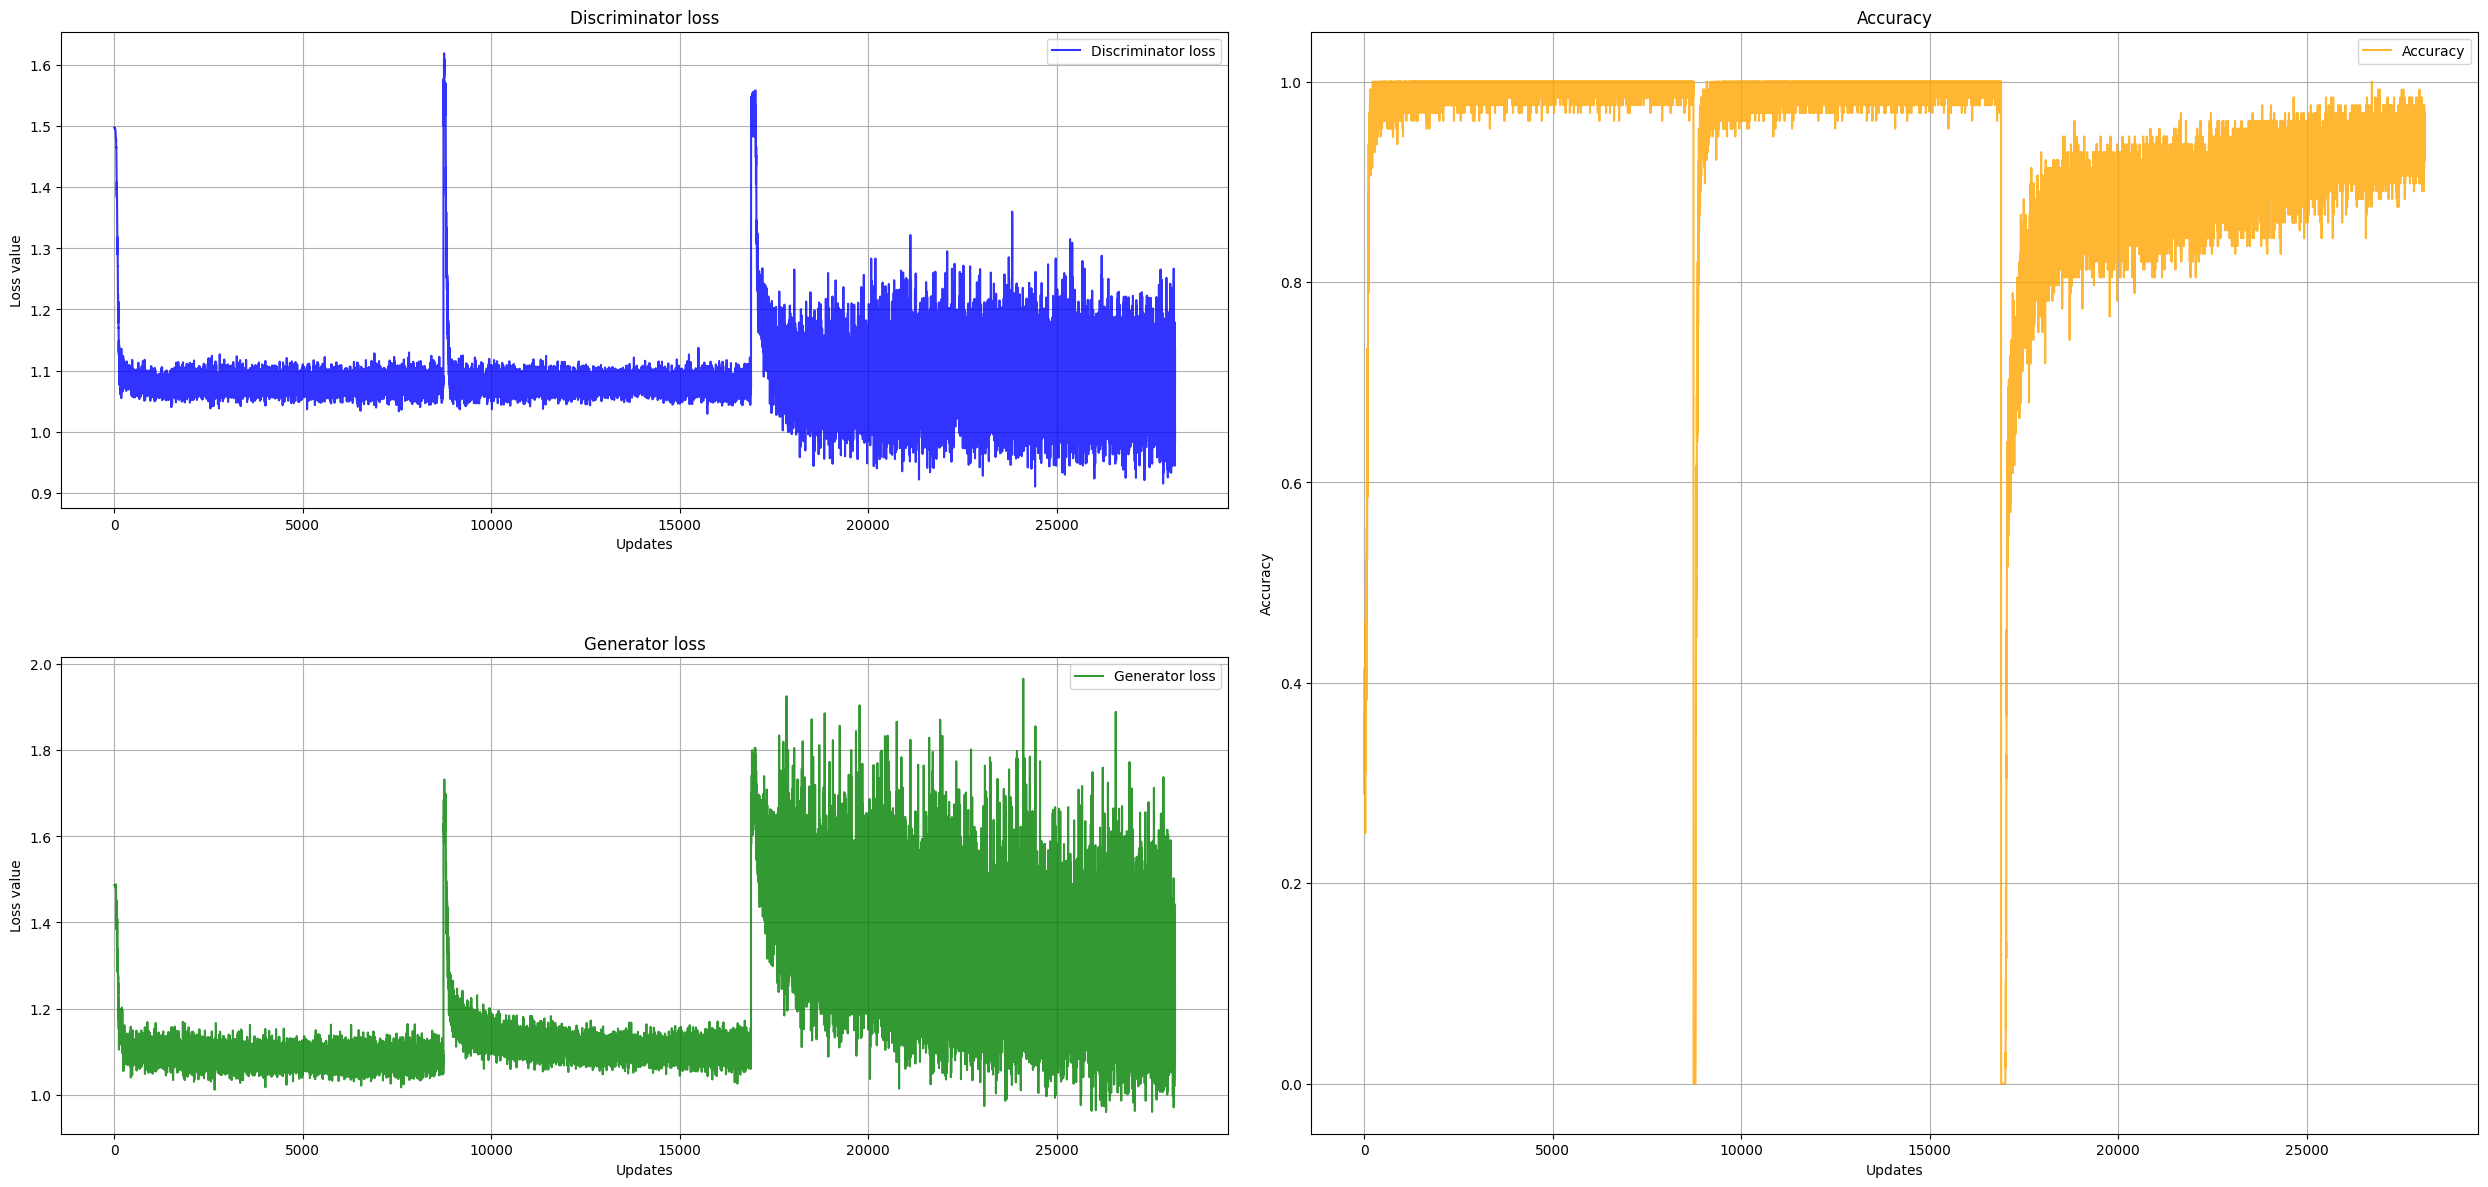

In [11]:
plot_history(history)

## Evaluate the architecture

As we can see, the model is able to generate quite well all digits even if it encountered them in distinct experiences.
For this specific execution, we notice that the first digits are represented better respect to the last ones. This could be caused by the value of constant in the *replay alignment loss* which leverages the regularization.

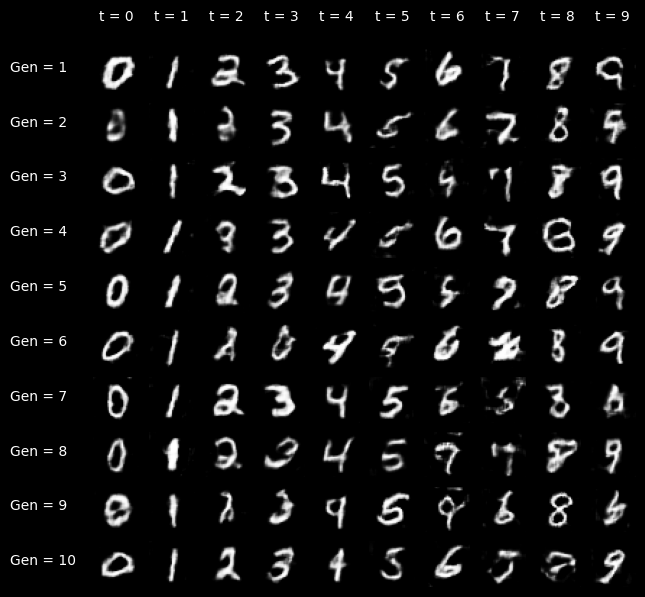

In [12]:
generate_classes(trainer.generator, config["num_classes"], rows=10, device=config["device"])